In [10]:
# استيراد المكتبات اللازمة
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt




In [11]:
iris = load_iris()
X = iris.data
y = iris.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred = knn.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

1.0

In [18]:
# perform 10-fold cross validation
score_list=[]
for k in range(1,50 ,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    score_list.append(scores.mean().round(2))
    print("k=", k,"  " ,'score=',scores.mean().round(2))
 

k= 1    score= 0.94
k= 3    score= 0.95
k= 5    score= 0.94
k= 7    score= 0.94
k= 9    score= 0.95
k= 11    score= 0.96
k= 13    score= 0.95
k= 15    score= 0.96
k= 17    score= 0.95
k= 19    score= 0.95
k= 21    score= 0.94
k= 23    score= 0.94
k= 25    score= 0.94
k= 27    score= 0.94
k= 29    score= 0.95
k= 31    score= 0.93
k= 33    score= 0.94
k= 35    score= 0.92
k= 37    score= 0.92
k= 39    score= 0.91
k= 41    score= 0.9
k= 43    score= 0.91
k= 45    score= 0.91
k= 47    score= 0.89
k= 49    score= 0.89


In [19]:
for j in range(1,50 ,2):
    knn = KNeighborsClassifier(n_neighbors=j) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(j, "      ",accuracy_score(y_test,y_pred)*100)


1        100.0
3        100.0
5        100.0
7        96.66666666666667
9        100.0
11        100.0
13        100.0
15        100.0
17        100.0
19        100.0
21        100.0
23        100.0
25        100.0
27        100.0
29        100.0
31        100.0
33        100.0
35        100.0
37        100.0
39        100.0
41        100.0
43        100.0
45        100.0
47        96.66666666666667
49        96.66666666666667


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Accuracy: 0.9666666666666667


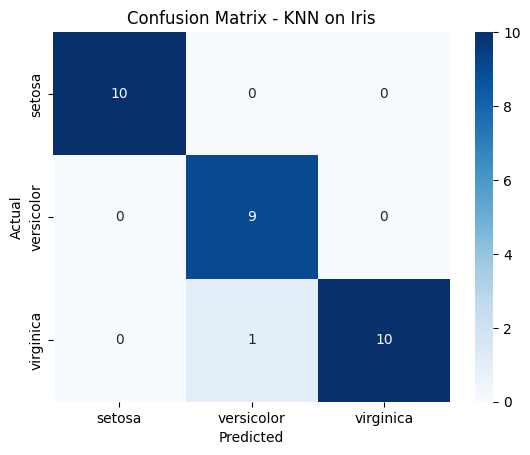

In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN on Iris')
plt.show()
